<code> What Is Logistic Regression?</code>
<pre>Logistic Regression is a supervised learning algorithm used for binary classification problems (yes/no, 0/1, true/false). 
Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities that are then mapped to 
class labels using a threshold (commonly 0.5).</pre>

#### <code>Logistic Regression for bivariate data</code>

<code>Perceptron</code>

In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [21]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

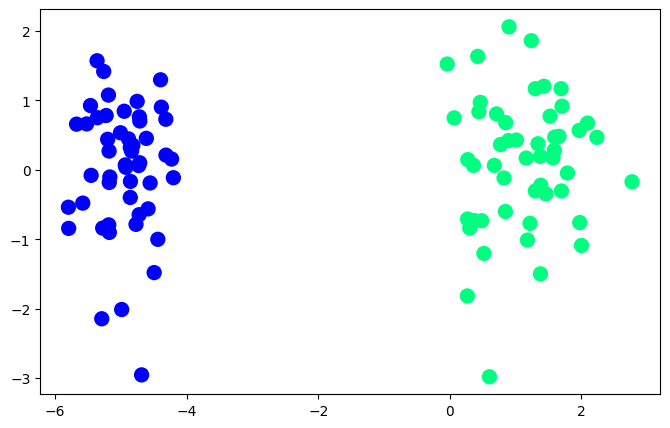

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [23]:
lor = LogisticRegression()
lor.fit(X,y)
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
m,b

(np.float64(-148.89041745447042), array([-297.9404898]))

(-3.0, 3.0)

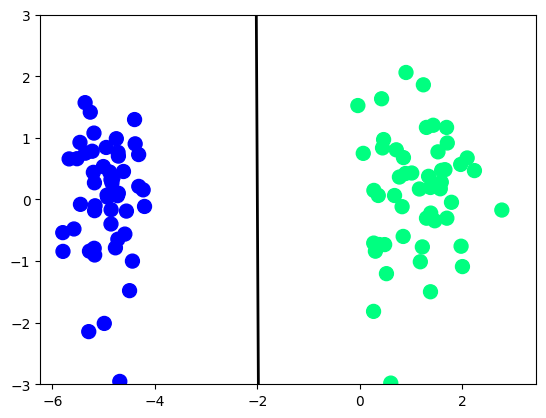

In [24]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b
plt.plot(x_input1,y_input1,color="black",linewidth=2) 
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,3)

In [25]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights +(lr*(y[j]-y_hat)) * X[j]
  
  return weights[0],weights[1:]

def step(z):
  return 1 if z>0 else 0

In [26]:
intercept_,coef_ = perceptron(X,y)
intercept_,coef_

(np.float64(1.2000000000000002), array([1.1204053 , 0.40381514]))

In [27]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m,b

(np.float64(-2.7745500252190514), np.float64(-2.9716568071029252))

In [28]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

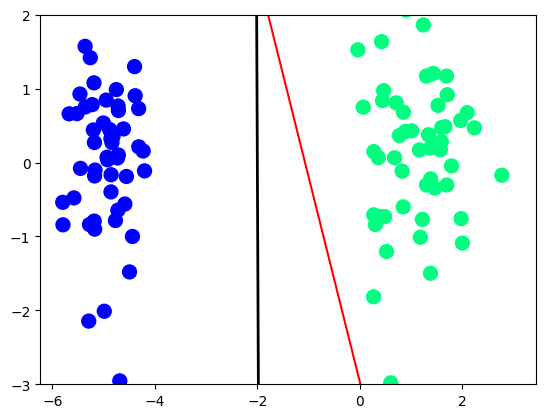

In [29]:
plt.plot(x_input2,y_input2,color="red")
plt.plot(x_input1,y_input1,color="black",linewidth=2) 
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="winter")
plt.ylim(-3,2)

<code>Sigmoid Function</code><br>
<code>1/1-exp<sup>-z</sup></code>

In [30]:
def perceptron_sigmoid(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = sigmoid(np.dot(X[j],weights))
    weights = weights +(lr*(y[j]-y_hat)) * X[j]
  
  return weights[0],weights[1:]

def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [31]:
intercept_,coef_ = perceptron_sigmoid(X,y)
intercept_,coef_

(np.float64(2.60629442296645), array([2.33204034, 0.26065062]))

In [32]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m,b

(np.float64(-8.946997016888066), np.float64(-9.999187415357605))

In [33]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input3 + b

(-3.0, 2.0)

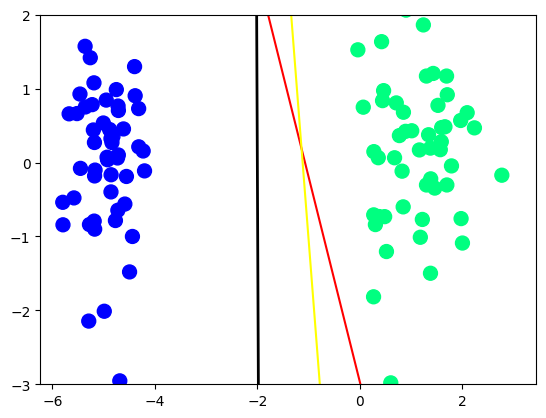

In [34]:
plt.plot(x_input1,y_input1,color="black",linewidth=2) 
plt.plot(x_input2,y_input2,color="red")
plt.plot(x_input3,y_input3,color="yellow")
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="winter")
plt.ylim(-3,2)

<code>Using Gradient Descent for Logistic Regression </code>

In [35]:
def GD(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5
  epochs = 5000

  for i in range(epochs):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + (lr * np.dot((y - y_hat),X)) / X.shape[0]
  
  return weights[0],weights[1:]

intercept_,coef_ = GD(X,y)
intercept_,coef_

(np.float64(5.102916648814875), array([3.47974267, 0.13305072]))

In [36]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [37]:
x_input4 = np.linspace(-3,3,100)
y_input4 = m*x_input4 + b

(-3.0, 2.0)

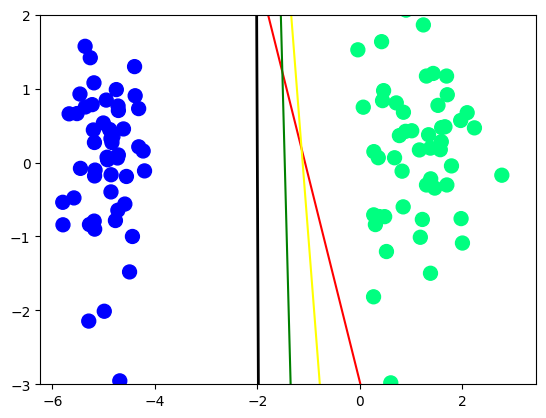

In [38]:
plt.plot(x_input1,y_input1,color="black",linewidth=2)
plt.plot(x_input2,y_input2,color="red")
plt.plot(x_input3,y_input3,color="yellow")
plt.plot(x_input4,y_input4,color="green")
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap="winter")
plt.ylim(-3,2)

#### <code>Logistic Regression for multivariate data</code>
<code>Softmax regression</code>

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [79]:
encode = LabelEncoder()
df["species"] = encode.fit_transform(df["species"])

In [80]:
df = df[["sepal_length","petal_length","species"]]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [81]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lor = LogisticRegression(multi_class="multinomial")
lor.fit(X_train,y_train)
y_pred = lor.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


c:\Users\mohsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [86]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [89]:
query = np.array([[3.4,2.7]])
lor.predict_proba(query) 

c:\Users\mohsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09242380e-01, 1.90157191e-01, 6.00428887e-04]])

In [90]:
lor.predict(query)

c:\Users\mohsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

c:\Users\mohsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


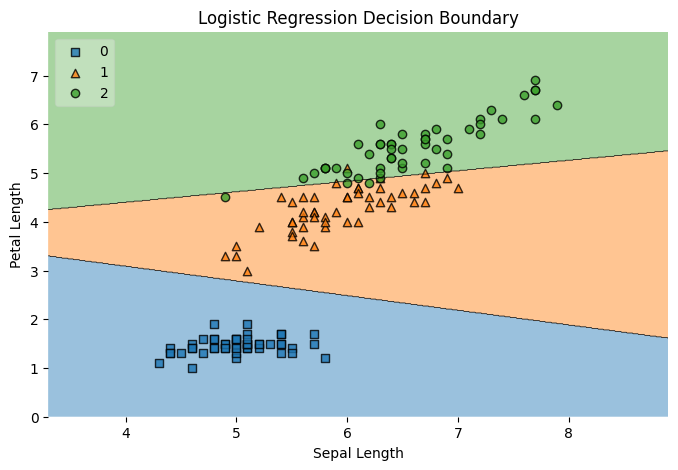

In [95]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(8,5))
plot_decision_regions(X.values, y.values, clf=lor, legend=2)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Logistic Regression Decision Boundary")
plt.show()